First, download medical_mnist.zip from Kaggle
https://www.kaggle.com/datasets/andrewmvd/medical-mnist
or from dropbox
https://www.dropbox.com/scl/fi/puo3gd1wmnat5ggz2naih/mmnist.zip?rlkey=uhiyemgjg6xl67qt36fdkyuny&e=2&dl=0
unzip the data to Exercise2 / mmnist/

import all the helper functions

In [1]:
from utils_mnist import *
import numpy as np

/Users/garychang/opt/anaconda3/envs/CourseML/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Here, we defines a Trainer class that manages the training process for a machine learning model. The overall_loop method runs for a specified number of epochs, where each epoch consists of a training phase and a validation phase. During the training loop, the model processes batches of data, calculates the loss, and updates its parameters to improve performance. The validation loop similarly processes batches of data but only calculates the loss without updating the model, helping to assess how well the model generalizes to unseen data. At the end of each epoch, the average training and validation losses are printed, allowing you to monitor the model's progress over time.

In [2]:
class Trainer():
    def __init__(self, args, train_loader, validation_loader, model, loss_function, optimizer):
        pass

    def overall_loop(self):
        for epoch in range(args['num_epochs']):
            train_loss = self.training_loop(train_loader)  # do the training look
            validation_loss = self.validation_loop(validation_loader) # do the validation loop
            # print out the training and validation loss per epoch
            print('Epoch [{}/{}], Train Loss: {:.4f}, Validation Loss: {:.4f}'
                  .format(epoch + 1, args['num_epochs'],
                          sum(train_loss) / len(train_loss), sum(validation_loss) / len(validation_loss)))

    def training_loop(self, train_loader):
        train_loss = []
        for i, train_batch in enumerate(train_loader):  # get mini-bacthes from the train_loader
            loss = self.training_step(train_batch) # get the train loss from the train_step
        train_loss.append(loss.item()) # add the train_loss up
        return train_loss

    def validation_loop(self, validation_loader):
        validation_loss = []
        for i, validation_batch in enumerate(validation_loader):
            loss = self.validation_step(validation_batch)
        validation_loss.append(loss.item())
        return validation_loss

    def training_step(self, train_batch):
        (images, labels) = train_batch
        images = images.reshape(-1, args['img_size'])  # turn the 2D image to a 1D feature (flatten)

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels) # calculate the loss

        # Magic section where we do optimization by backpropogation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        return loss

    def validation_step(self, validation_batch):
        (images, labels) = validation_batch
        images = images.reshape(-1, args['img_size'])  # turn the 2D image to a 1D feature (flatten)

        # Forward pass
        outputs = model(images)  # get the model output
        loss = loss_function(outputs, labels)  # calculate the loss

        return loss

define all the arguments (hyperparameters)

The get_arguments() function is defining a set of hyperparameters and configuration settings for a machine learning model. Here's what each part means:

img_size: 64 * 64 = 4096. This suggests the input images are 64x64 pixels, flattened into a 1D array of 4096 elements.
num_classes: 10. This indicates the model is designed for a classification task with 10 different classes.
num_epochs: 50. The model will train for 50 complete passes through the entire dataset.
batch_size: 16. During training, the data will be processed in batches of 16 samples at a time.
learning_rate: 0.001. This is the step size at each iteration while moving toward a minimum of the loss function.
model: 'logistic_regression'. This specifies which model architecture to use. The comment suggests you could also choose 'MLP' (Multi-Layer Perceptron) as an alternative.

In [4]:
# arguments
def get_arguments():
    # Hyper-parameters
    args = {'img_size': 64 * 64,
            'num_classes': 10,
            'num_epochs': 50,
            'batch_size': 16,
            'learning_rate': 0.001,
            'model': 'logistic_regression'} # MLP or logistic_regression
    return args

args = get_arguments()
print(args)

{'img_size': 4096, 'num_classes': 10, 'num_epochs': 50, 'batch_size': 16, 'learning_rate': 0.001, 'model': 'logistic_regression'}


In [5]:
# Medical MNIST dataset (images and labels)
train_loader, validation_loader = get_medical_mnist(args=args)
print('Done with data preparation')

data folder:  mmnist/
length of all images: 42000
length of all images: 16954
Done with data preparation


In [6]:
print('Length of train dataset:')
print(len(train_loader.dataset))
print('Length of validation dataset:')
print(len(validation_loader.dataset))
print('Length of train dataloader:')
print(len(train_loader))
print('Length of validation dataloader:')
print(len(validation_loader))
print('Why is that?')

Length of train dataset:
42000
Length of validation dataset:
16954
Length of train dataloader:
2625
Length of validation dataloader:
1060
Why is that?


Let's look at some images

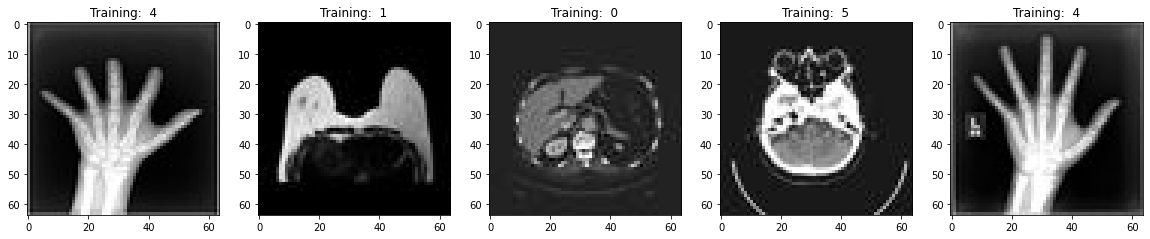

In [7]:
some_index = np.random.randint(0, len(train_loader.dataset), 10)
some_imgs = [train_loader.dataset.__getitem__(idx)[0] for idx in some_index]
some_labels = [train_loader.dataset.__getitem__(idx)[1] for idx in some_index]

show_examples(some_imgs[:5], some_labels[:5])

In [8]:
# get model
if args['model'] == 'logistic_regression':
    print('Using logistic regression')
    model = nn.Linear(args['img_size'], args['num_classes'])
elif args['model'] == 'MLP':
    print('MLP')
    model = MLP(dropout=0, hidden_1=512, hidden_2=512)

Using logistic regression


In [9]:
# Loss and optimizer
loss_function = nn.CrossEntropyLoss() # this combined the LogSoftmax and NLLLoss
optimizer = torch.optim.SGD(model.parameters(), lr=args['learning_rate'])

Lets build the trainer together

In [10]:
trainer = Trainer(args, train_loader, validation_loader, model, loss_function, optimizer)

Start the training!

In [11]:
trainer.overall_loop()

Epoch [1/50], Train Loss: 0.2158, Validation Loss: 0.4985
Epoch [2/50], Train Loss: 0.1602, Validation Loss: 0.4257
Epoch [3/50], Train Loss: 0.0823, Validation Loss: 0.3752
Epoch [4/50], Train Loss: 0.1954, Validation Loss: 0.3544
Epoch [5/50], Train Loss: 0.1564, Validation Loss: 0.3499
Epoch [6/50], Train Loss: 0.1893, Validation Loss: 0.3252
Epoch [7/50], Train Loss: 0.0558, Validation Loss: 0.3159
Epoch [8/50], Train Loss: 0.1103, Validation Loss: 0.3078
Epoch [9/50], Train Loss: 0.0548, Validation Loss: 0.3069
Epoch [10/50], Train Loss: 0.1042, Validation Loss: 0.2996
Epoch [11/50], Train Loss: 0.1110, Validation Loss: 0.2874
Epoch [12/50], Train Loss: 0.0236, Validation Loss: 0.2893
Epoch [13/50], Train Loss: 0.0606, Validation Loss: 0.2737
Epoch [14/50], Train Loss: 0.0531, Validation Loss: 0.2779
Epoch [15/50], Train Loss: 0.0950, Validation Loss: 0.2654
Epoch [16/50], Train Loss: 0.0697, Validation Loss: 0.2642
Epoch [17/50], Train Loss: 0.0375, Validation Loss: 0.2618
Epoch 

Calculating validation accuracy

In [12]:
correct = 0
total = 0
for images, labels in validation_loader:
    images = images.reshape(-1, args['img_size'])
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print(correct)
print(total)

print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

16572
16954
Accuracy of the model on the 10000 test images: 97.74684440250088 %
